클러스터링
==
데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

데이터 읽기
--

In [3]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [5]:
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [8]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'], errors='ignore')

In [10]:
power.shape

(17, 27)

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [11]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

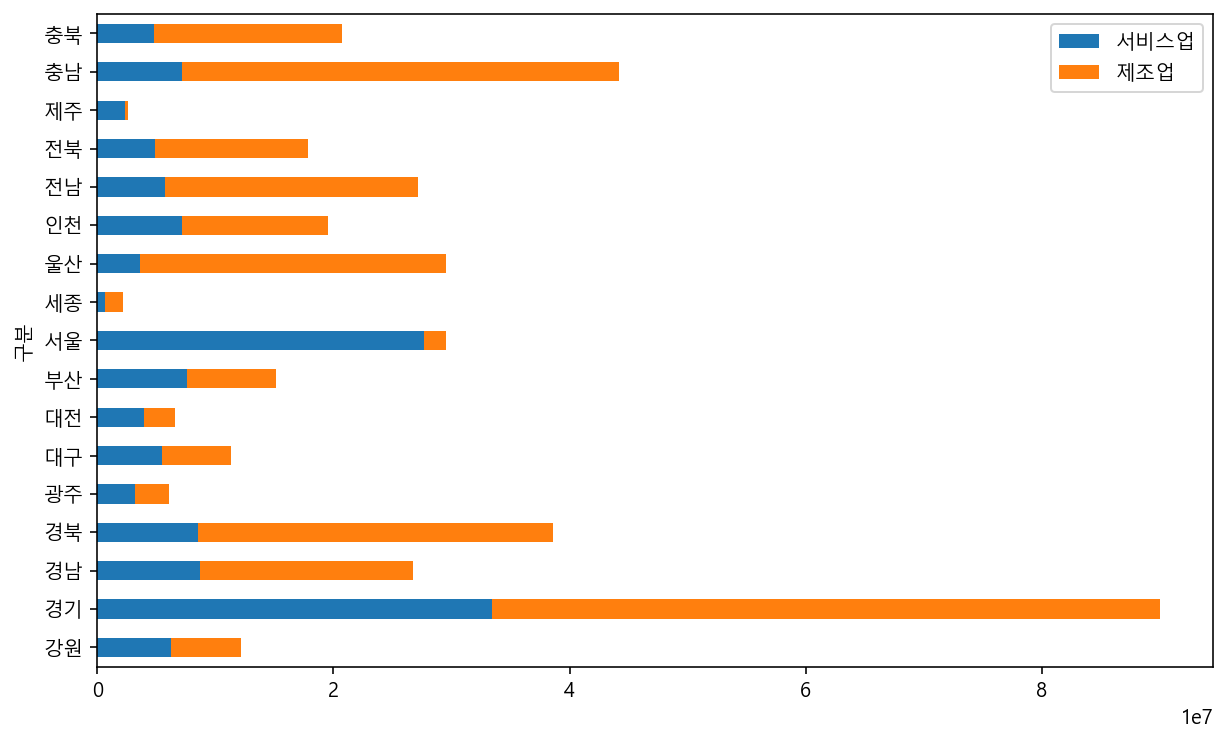

In [12]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [13]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


In [14]:
power = power.drop(['경기', '서울'])
n_samples = power.shape[0] ; n_samples

15

In [15]:
power.shape

(15, 2)

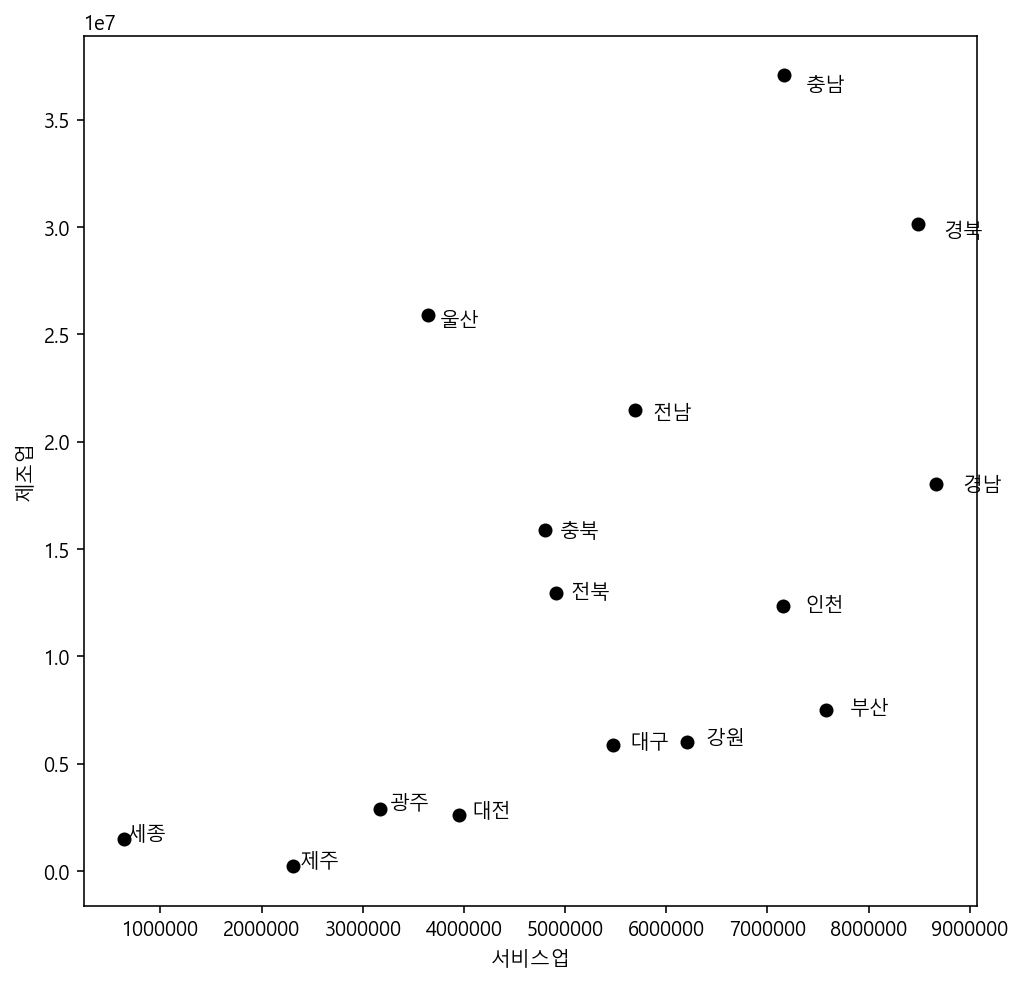

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

Scatter 플롯
--

덴드로그램
--


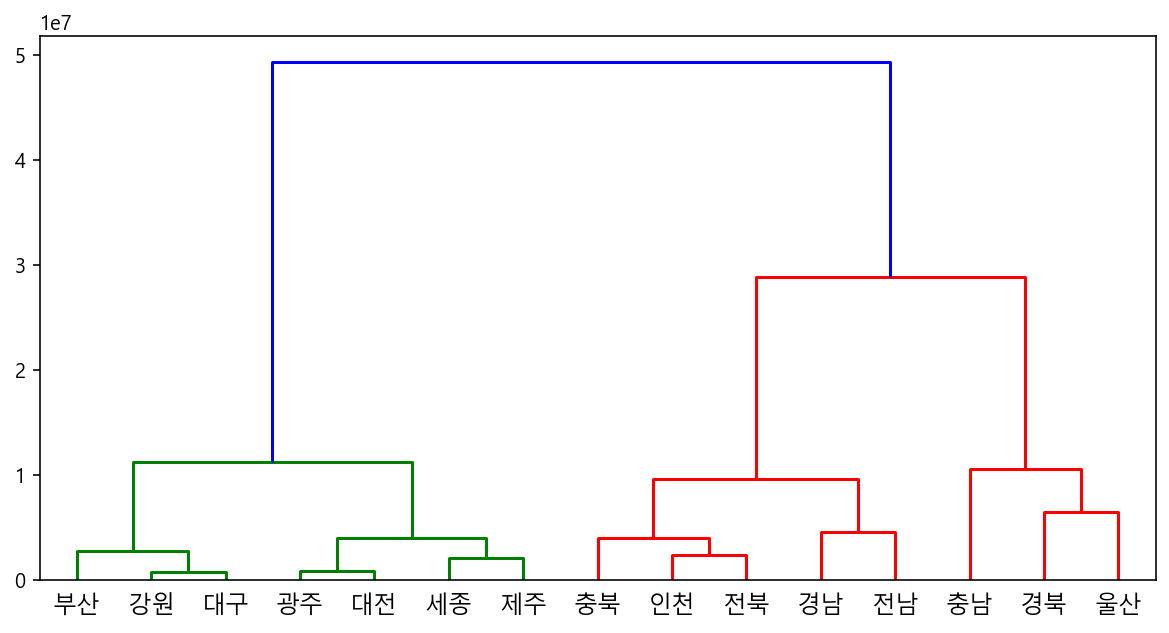

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

클러스터링 (KMeans)
--

In [14]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3)
k = kms.fit(power)

3


In [18]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3).fit(power)
print(k.n_clusters)

3


In [19]:
power[:, '클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,1
경남,8667737,18053778,2
경북,8487402,30115601,0
광주,3174973,2910768,1
대구,5470438,5862633,1
대전,3955921,2608343,1
부산,7582169,7512588,1
세종,645424,1502922,1
울산,3649386,25883132,0


In [19]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,1
경남,8667737,18053778,2
경북,8487402,30115601,0
광주,3174973,2910768,1
대구,5470438,5862633,1
대전,3955921,2608343,1
부산,7582169,7512588,1
세종,645424,1502922,1
울산,3649386,25883132,0


In [20]:
k.labels_

array([1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2])

In [21]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [22]:
centers = k.cluster_centers_ ; centers

array([[ 6433742.33333333, 31018896.        ],
       [ 4191629.42857143,  3805868.14285714],
       [ 6245553.6       , 16144968.6       ]])

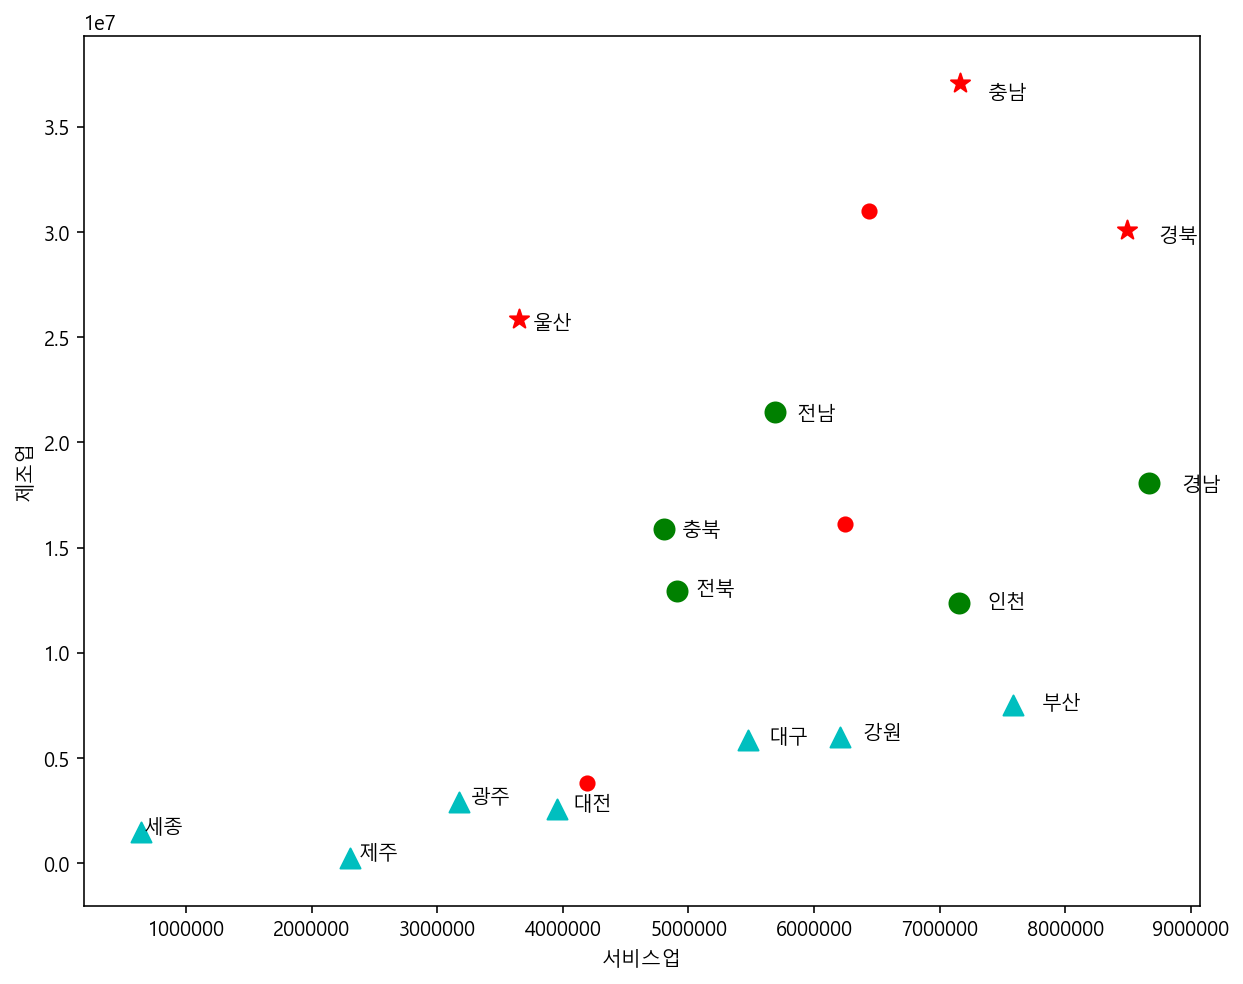

In [23]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

스케일링 (표준 정규화)
--

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


정규화 이후의 클러스터링
--

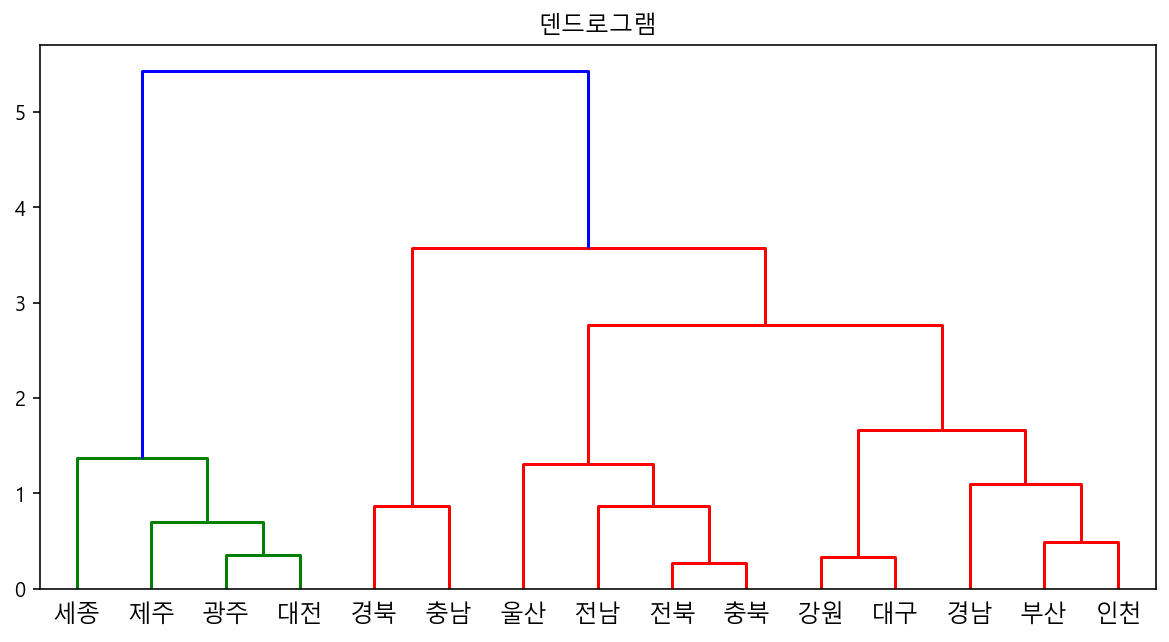

In [28]:
Z = linkage(power, metric='euclidean', method='ward')  # 유클리드 거리를 이용해 Linkage Matrix를 생성
         
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [29]:
k = KMeans(n_clusters= 4).fit(power)

In [30]:
centers = k.cluster_centers_

In [31]:
centers

array([[ 1.12104758,  1.85861879],
       [ 0.75790833, -0.31260097],
       [-1.25649503, -1.06099427],
       [-0.25141418,  0.52243609]])

#### plt.clf()
- 창은 닫지 않고, 생성한 그래프를 clear 한다.
- 즉, 열린 창에 그림을 지우고 다른 그림을 그릴 수 있습니다.

#### plt.close()
- 그림 창을 완전히 닫습니다. 

<Figure size 432x288 with 0 Axes>

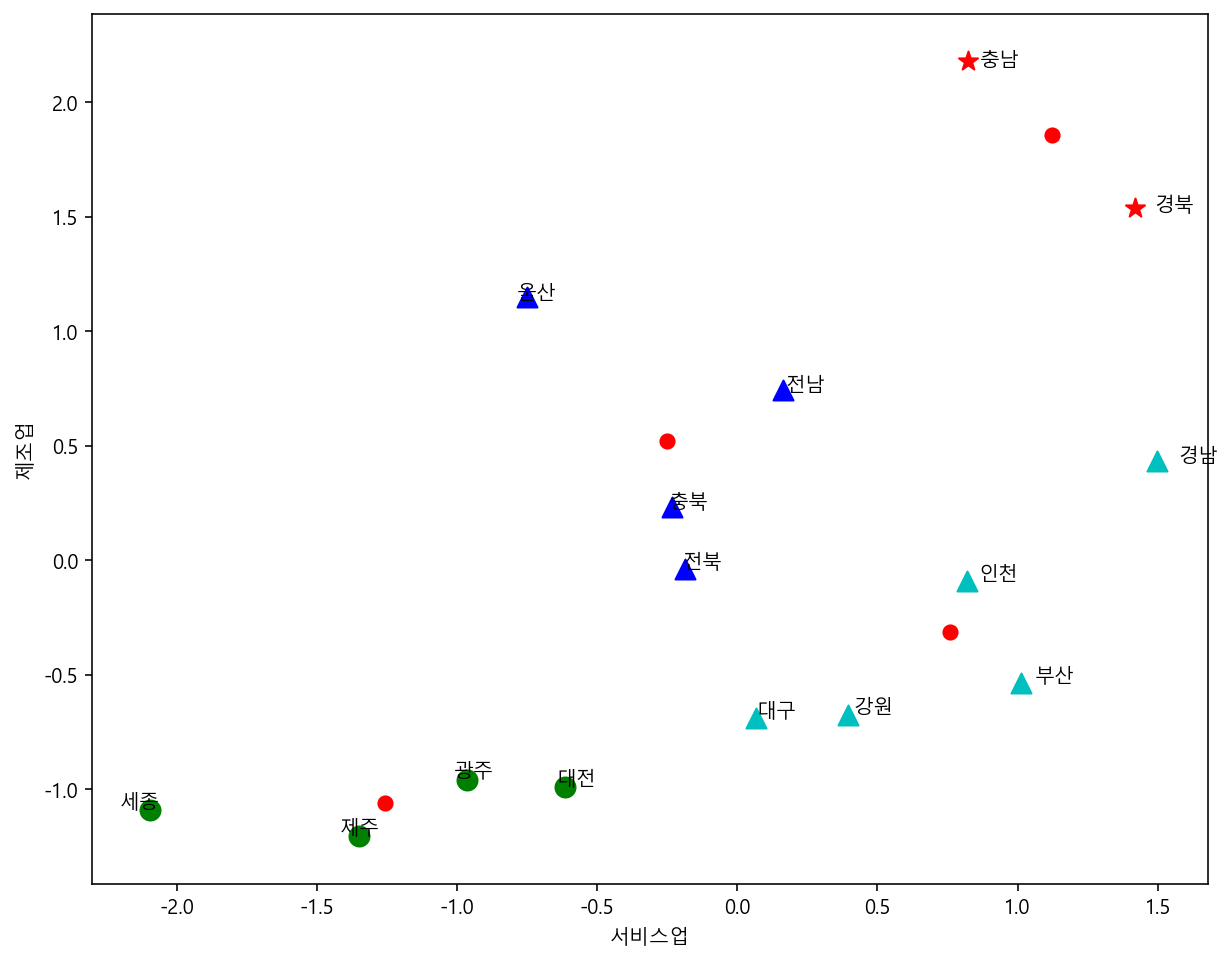

In [32]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

모든 특성을 고려한 클러스터링 (두개가 아니라)
--

In [24]:
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [35]:
power2 = power_data.set_index('구분')

In [37]:
power2.head(2).T

구분,강원,개성
주거용,1940933,0
공공용,1400421,0
서비스업,6203749,0
업무용합계,7604170,0
농림어업,607139,0
광업,398287,0
제조업,6002286,0
식료품제조,546621,0
"섬유,의류",13027,0
"목재,나무",19147,0


In [38]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [39]:
power2.head(2).T

구분,강원,경남
주거용,1940933,4260988
공공용,1400421,1427560
서비스업,6203749,8667737
농림어업,607139,2141813
광업,398287,95989
제조업,6002286,18053778
식료품제조,546621,932743
"섬유,의류",13027,346974
"목재,나무",19147,60160
"펄프,종이",24382,817685


In [27]:
index_power = power2.index
column_power = power2.columns
manufacture = list(column_power).index('제조업')
service = list(column_power).index('서비스업')

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
power3 = scaler.fit_transform(power2)  # 이제 power3는 ndarray이다

In [29]:
type(power3);type(power2)

pandas.core.frame.DataFrame

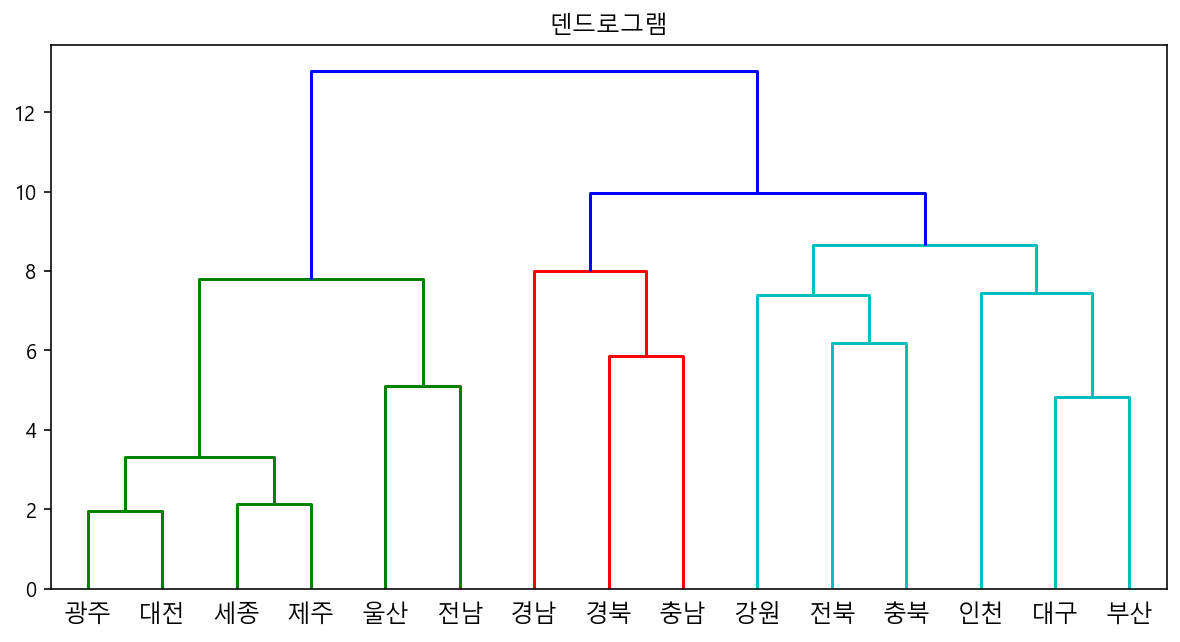

In [30]:
Z = linkage(power3, metric='euclidean', method='ward')  # 유클리드 거리를 이용해 Linkage Matrix를 생성

plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=index_power)
plt.show()

In [31]:
k = KMeans(n_clusters=4).fit(power3)

- 모든 특성 변수를 고려한 다차원(15차원) 공간은 보여 주지 못하므로, 2차원(서비스업, 제조업) 공간만 보여준다.

15


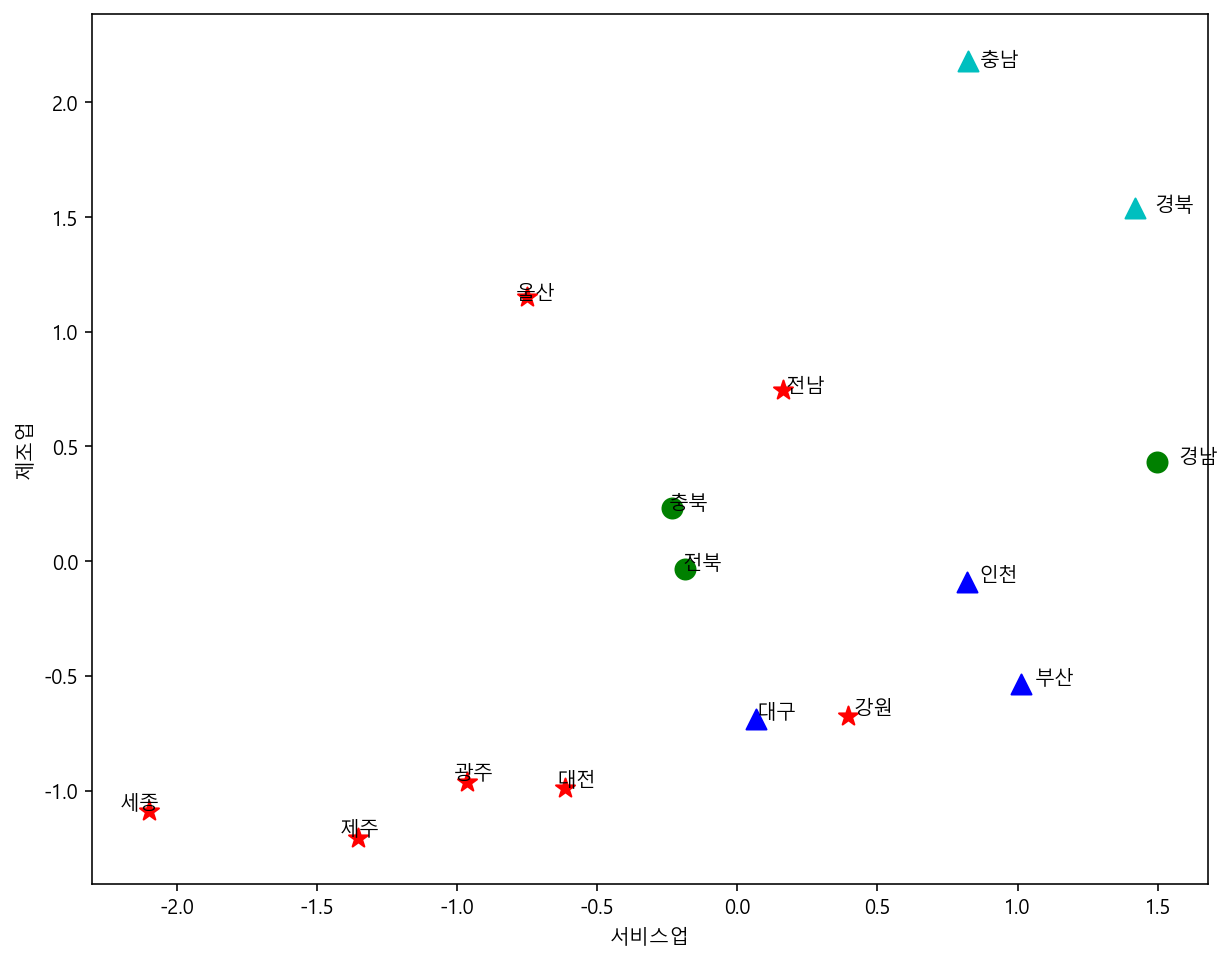

In [32]:
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3[n][service], power3[n][manufacture], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3[n][service]*1.05, power3[n][manufacture]*0.99, index_power[n])

## DBSCAN

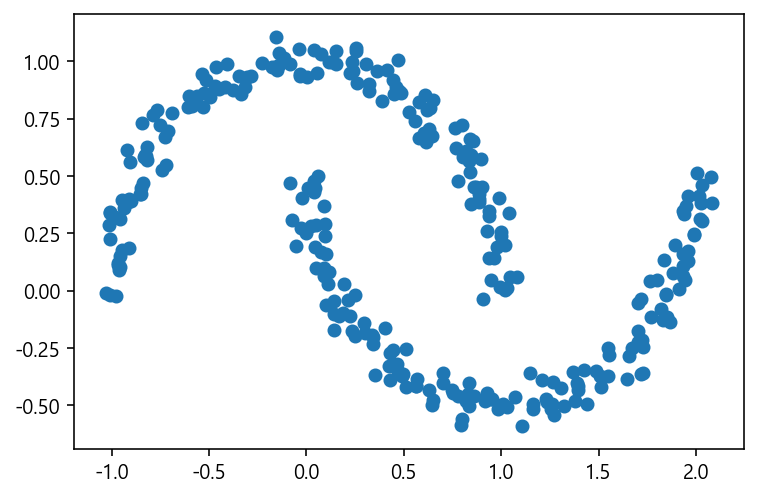

In [41]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [42]:
print(X)

[[ 0.09999454 -0.06140157]
 [-0.84634104  0.72976933]
 [-0.22592098  0.99424568]
 [ 1.2646073  -0.39786026]
 [ 0.98061929  0.19150151]
 [ 1.7194218  -0.36355095]
 [ 1.70027338 -0.22218852]
 [ 0.64520759  0.67619025]
 [ 0.5632047  -0.41436822]
 [ 0.31995317  0.90017433]
 [-0.72008005  0.55000735]
 [ 1.83760498  0.13244443]
 [-0.85164728  0.447588  ]
 [ 0.34226246 -0.20122148]
 [ 0.04018325  0.47835229]
 [ 0.34118132 -0.23214137]
 [-0.90193319  0.3902305 ]
 [ 0.82061988 -0.47900711]
 [ 0.11451512  0.99912056]
 [ 0.93815896  0.32638422]
 [ 1.96170113  0.17226221]
 [ 0.40273417 -0.16314217]
 [ 1.02078445  0.00211579]
 [ 0.0397841   0.43032628]
 [ 1.931531    0.10787329]
 [-1.00685349  0.33832601]
 [ 0.99755243  0.25684857]
 [ 1.91363866  0.00920975]
 [ 0.61637236  0.64854713]
 [ 0.09152242  0.37046258]
 [ 2.01880066  0.31452398]
 [ 0.09147352  0.09833024]
 [ 0.47597291  0.87057385]
 [ 0.93632973  0.34554661]
 [ 0.32314261  0.87155026]
 [ 0.88563127  0.42237998]
 [-0.08259425  0.47014513]
 

#### plt.scatter()
- c : color, sequence, or sequence of color, optional
    - The marker color.

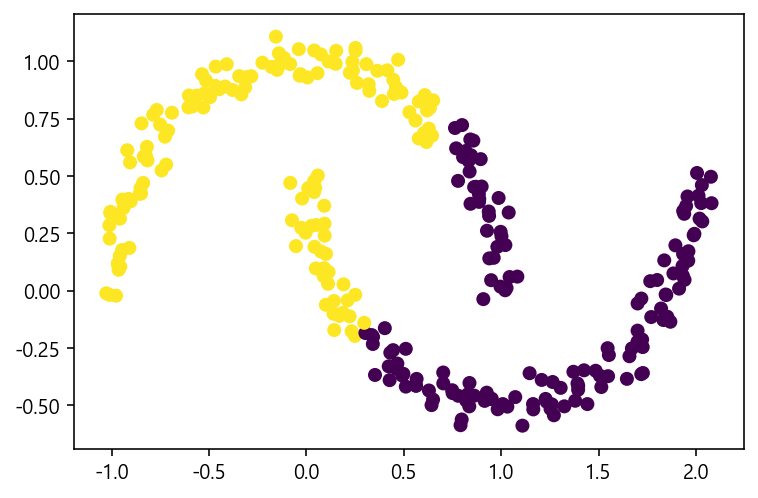

In [43]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

### DBSCAN
- eps : 반경
- min_samples : 최소 샘플 수(반경 내)

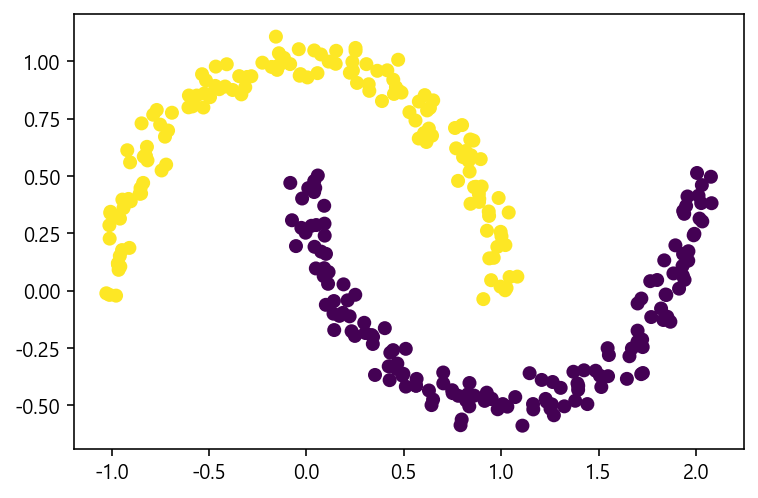

In [44]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

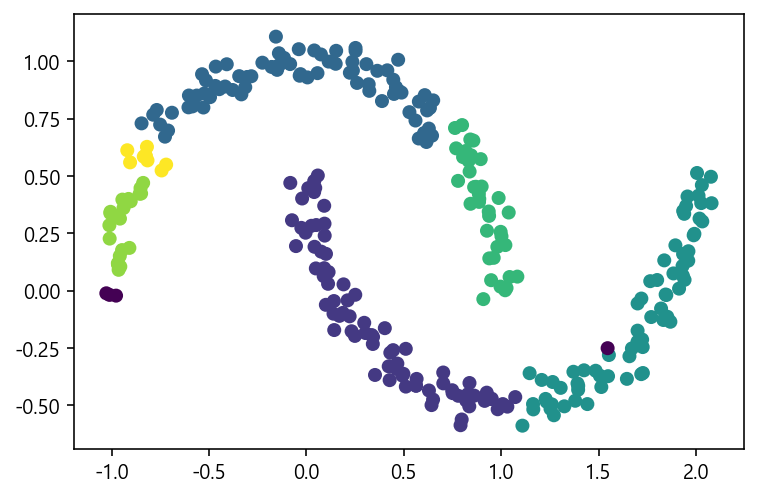

In [46]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

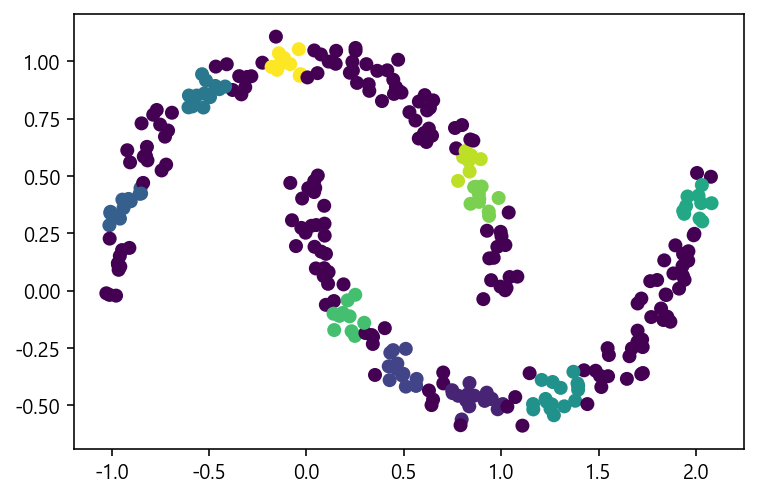

In [47]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

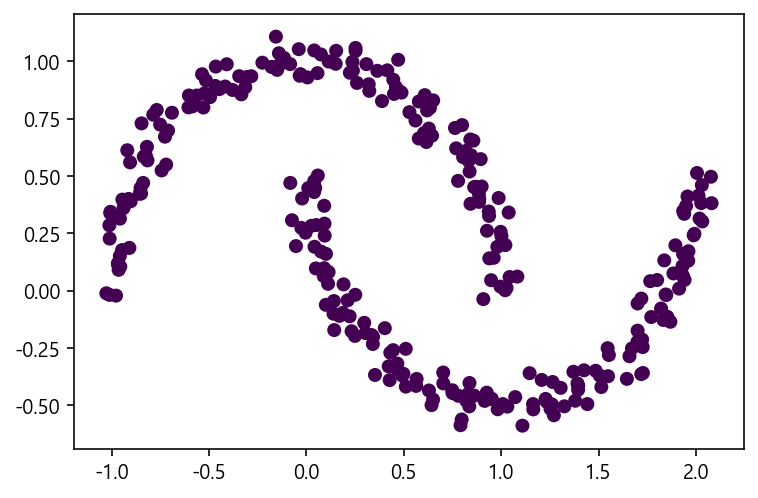

In [48]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

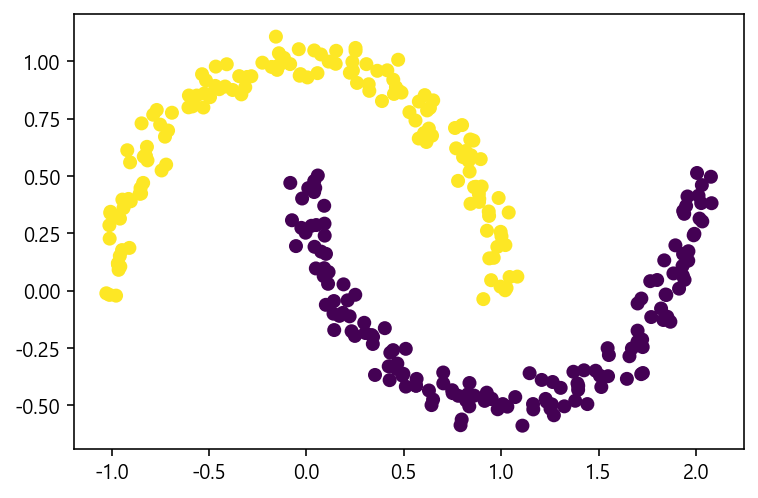

In [49]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

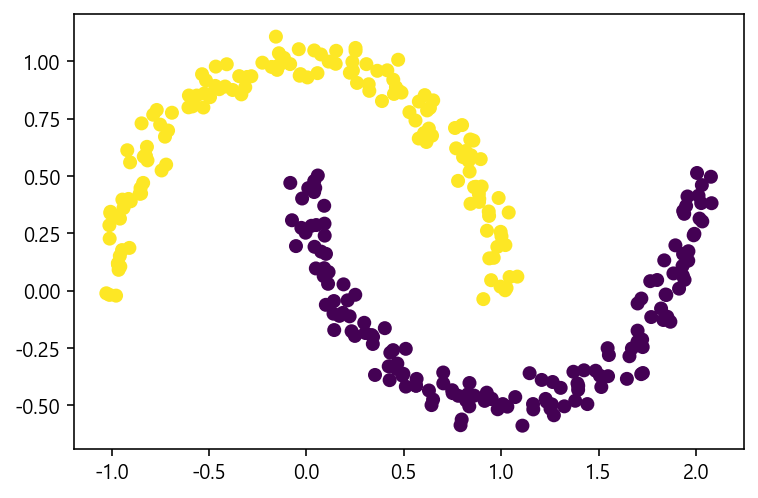

In [51]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)